## Confusion Matrix of Iris Dataset using k-NN

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\sklearn\neighbors\_base.py:600: RuntimeWarning: invalid value encountered in sqrt
  return tree.query(*args, **kwargs)


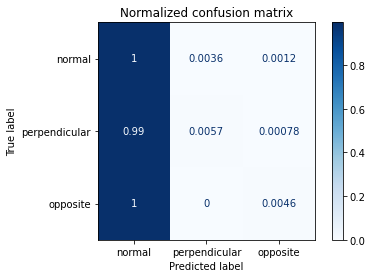

In [2]:
df = pd.read_csv("../accelerometer.csv")

features = df[["pctid", "x", "y", "z"]].values
target = df["wconfid"].values
target_names = ["normal", "perpendicular", "opposite"]

seed = 0

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

k = 1

knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)}, n_jobs=-1)
knn.fit(x_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()